## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch, torchvision, random, cv2
import torchvision.transforms as T
from torchvision.models.detection import MaskRCNN

from PIL import Image, ImageDraw

In [ ]:
## Load COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    ' None', '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained = True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 127MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

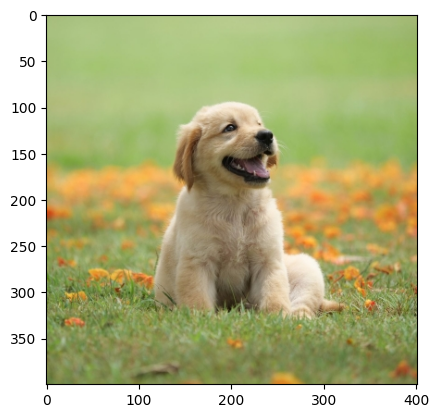

In [ ]:
img_path = "Datasets/dog.jpg"
img = plt.imread(img_path)
plt.imshow(img)

In [ ]:
## Function to get predictions
def get_prediction(img_path, threshold):
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)

  with torch.no_grad():
    pred = model([img])

  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]

  masks = (pred[0]['masks']>threshold).squeeze().detach().cpu().numpy()
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]),(i[2], i[3]) ] for i in list(pred[0]['boxes'].detach().numpy())]

  masks = masks[: pred_t+1]
  pred_boxes = pred_boxes[: pred_t+1]
  pred_class = pred_class[: pred_t+1]

  return  masks, pred_boxes,  pred_class

In [ ]:
masks, boxes, category = get_prediction(img_path, 0.5)
category

['dog']

In [ ]:
boxes

[[(113.13939, 95.80373), (307.3694, 340.7187)]]

In [ ]:
masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [ ]:
img.shape, masks.shape

((400, 401, 3), (1, 400, 401))

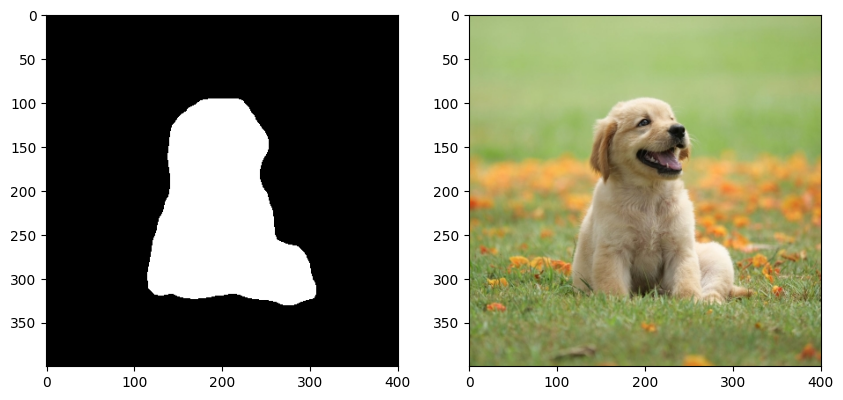

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(masks.reshape(400,401), cmap = 'gray')
plt.subplot(122)
plt.imshow(img)

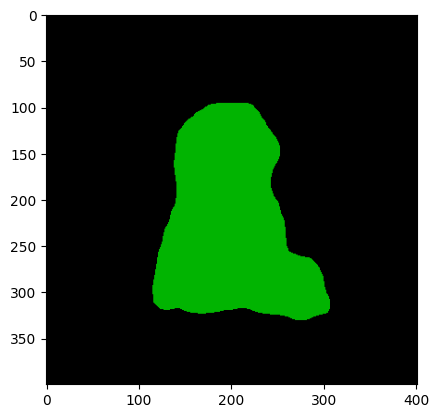

In [ ]:
mask = np.array(masks.squeeze(), dtype=np.uint8)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask[:,:,1] *= 180
plt.imshow(mask)

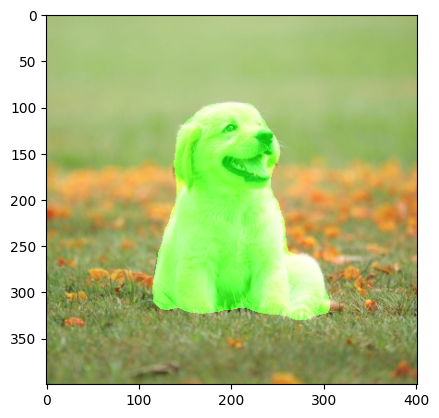

In [ ]:
new = cv2.add(img, mask)
plt.imshow(new)

In [ ]:
def random_colour_masks(image):
  colours = [[0,255,0], [255,0,0], [0,0,255],[0,255,255], [255,255,0],[255,0,255],[80,70,180], [250,80,190], [245,145,50], [70,150,250]]
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  r[image==1], g[image ==1], b[image==1] = colours[random.randrange(len(colours))]
  coloured_mask =np.stack([r,g,b], axis = 2)
  return coloured_mask

In [ ]:
def find_mask(img_path, threshold=0.5):
  masks, boxes, category = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(masks)):
    rgb_mask = random_colour_masks(masks[i])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
  plt.figure(figsize=(10,10))
  plt.imshow(img)

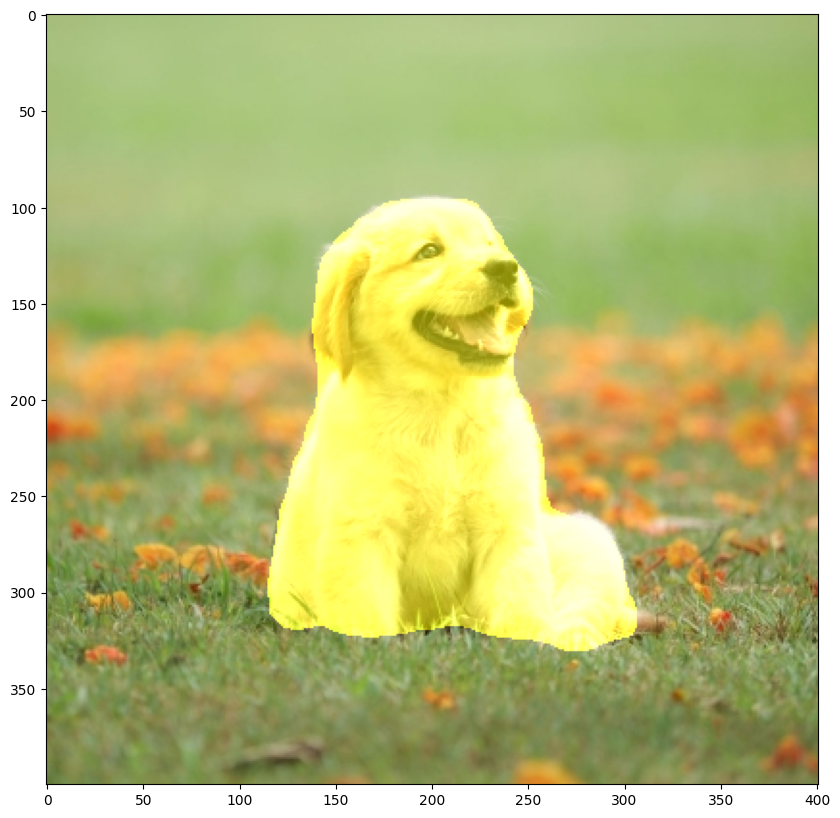

In [ ]:
find_mask(img_path)